# 

In [2]:
import numpy as np
import pandas as pd

import random

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model
from keras.layers import Dropout, Activation

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [3]:
from sklearn.preprocessing import MinMaxScaler

ds = pd.read_csv('/users/siru/WKUSDNDDOS/Codes/controller/Sirudata.csv')
null_values_mask = ds.isnull().any()
null_values_count = null_values_mask.sum()
print('Null values in dataset are', null_values_count)
print('=' * 40)

# Checking for DUPLICATE values
ds.drop_duplicates(keep='first', inplace=True)

# For now, just drop NA's (rows with missing values)
ds.dropna(inplace=True, axis=1)
print("Read {} rows.".format(len(ds)))

# Reset index after dropping NA's
dc = ds.dropna().reset_index()

# Label encoding
labelencoder = LabelEncoder()
dc['label'] = labelencoder.fit_transform(dc['label'])

# Convert to numpy arrays
dp = dc.to_numpy(dtype="float32")
dp = dp[~np.isinf(dp).any(axis=1)]

# Feature matrix X should include columns 1 to 21 (excluding the index and label)
Xp = dp[:, 1:22]

# One-hot encoding for the label ( label is in the 23rd column)
enc = OneHotEncoder(sparse_output=False)
Yp = enc.fit_transform(dp[:, 22].reshape(-1, 1))

# Standard scaling for features
scaler = MinMaxScaler(feature_range=(0, 1))  # Adjust range if needed
Xp_scaledp = scaler.fit_transform(Xp)

# Stratified sampling for data splitting
Xp_train, Xp_test, Yp_train, Yp_test = train_test_split(
    Xp_scaledp, Yp, test_size=0.25, random_state=2, stratify=Yp, shuffle=True
)
_features = Xp.shape[1]
n_classes = Yp.shape[1]
print('Xp.shape =', Xp.shape)
print('Yp.shape =', Yp.shape)
print('Xp_train.shape =', Xp_train.shape)
print('Yp_train.shape =', Yp_train.shape)
print('Xp_test.shape =', Xp_test.shape)
print('Yp_test.shape =', Yp_test.shape)

Null values in dataset are 0
Read 4116074 rows.
Xp.shape = (4116074, 21)
Yp.shape = (4116074, 8)
Xp_train.shape = (3087055, 21)
Yp_train.shape = (3087055, 8)
Xp_test.shape = (1029019, 21)
Yp_test.shape = (1029019, 8)


Epoch 1/30
1351/1351 [==============================] - 6s 4ms/step - loss: 0.0261
Epoch 2/30
1351/1351 [==============================] - 6s 4ms/step - loss: 0.0055
Epoch 3/30
1351/1351 [==============================] - 6s 4ms/step - loss: 0.0037
Epoch 4/30
1351/1351 [==============================] - 6s 4ms/step - loss: 0.0029
Epoch 5/30
1351/1351 [==============================] - 6s 4ms/step - loss: 0.0025
Epoch 6/30
1351/1351 [==============================] - 6s 5ms/step - loss: 0.0022
Epoch 7/30
1351/1351 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 8/30
1351/1351 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 9/30
1351/1351 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 10/30
1351/1351 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 11/30
1351/1351 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 12/30
1351/1351 [==============================] - 6s 4ms/step - loss: 0.0016
E

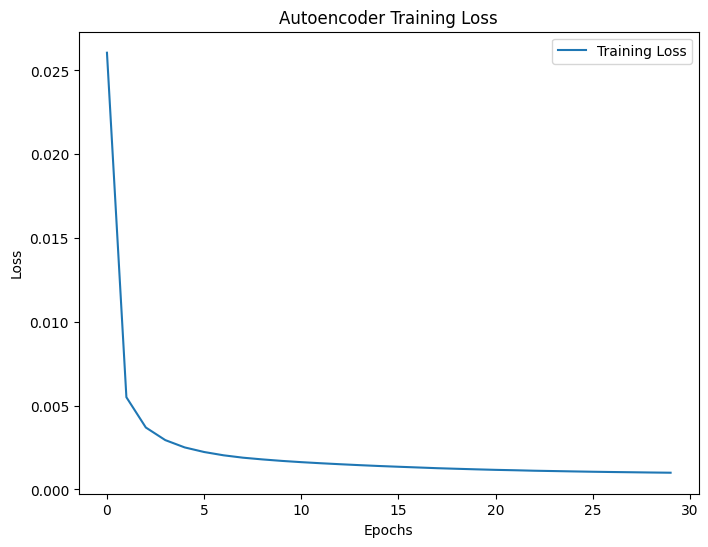

1514/1514 [==============================] - 2s 1ms/step
Accuracy: 0.9986
Confusion Matrix:
 [[38423     0]
 [   69  9931]]
Precision: 0.9986
Recall: 0.9986
F1 Score: 0.9986
ROC-AUC Score: 0.9966
Average Precision Score: 0.9945
Matthews Correlation Coefficient: 0.9957
Cohen's Kappa: 0.9956
Balanced Accuracy: 0.9966
PR AUC: 0.9973
Best Hyperparameters:


In [36]:
# Stage 2 Models Evaluation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score, precision_recall_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredLogarithmicError
np.random.seed(42)
tf.random.set_seed(42)
# Extract features (X) and labels (Y)
AX = dp[:, 1:22]
Ay = dp[:, -1]

# Filter benign data
X_benign_autoencoder = AX[Ay == 0]

# Split the benign data for training (90%) and testing (10%)
x_train_autoencoder, x_test_benign_autoencoder, _, _ = train_test_split(
    X_benign_autoencoder,
    np.zeros(X_benign_autoencoder.shape[0]),  # Labels are all zeros for benign data
    test_size=0.1,
    stratify=np.zeros(X_benign_autoencoder.shape[0]),
    random_state=42  # Set random state for reproducibility
)

# Randomly select 10,000 anomalous instances with labels from 1 to 7 for testing
X_anomalous_autoencoder_test = AX[(Ay >= 7)]
selected_anomalous_indices = np.random.choice(X_anomalous_autoencoder_test.shape[0], size=10000, replace=False)
X_anomalous_autoencoder_test = X_anomalous_autoencoder_test[selected_anomalous_indices, :]

# Labels: 1 for anomaly, 0 for normal
y_anomalous_autoencoder_test = np.ones(X_anomalous_autoencoder_test.shape[0])

# Combine the benign test data and anomalous test data
x_test_autoencoder = np.vstack([x_test_benign_autoencoder, X_anomalous_autoencoder_test])
y_test_autoencoder = np.concatenate([np.zeros(x_test_benign_autoencoder.shape[0]), y_anomalous_autoencoder_test])

# Scale the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_autoencoder_scaled = min_max_scaler.fit_transform(x_train_autoencoder.copy())
x_test_autoencoder_scaled = min_max_scaler.transform(x_test_autoencoder.copy())

# Build the model with the best hyperparameters
AE = Sequential()
AE.add(Dense(units=256, activation='relu', input_dim=x_train_autoencoder_scaled.shape[1]))
AE.add(Dropout(rate=0.2))

AE.add(Dense(units=96, activation='relu'))
AE.add(Dropout(rate=0.3))
AE.add(Dense(x_train_autoencoder_scaled.shape[1], activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
AE.compile(optimizer=optimizer, loss='mean_squared_logarithmic_error')

# Fit the model to the entire training data
#model.fit(x_train_autoencoder_scaled, x_train_autoencoder_scaled, epochs=30, batch_size=256, shuffle=True)
history = AE.fit(x_train_autoencoder_scaled, x_train_autoencoder_scaled, epochs=30, batch_size=256, shuffle=True, verbose=1)

# Plot the training loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.show()

# Evaluate on the benign instances
mse_normal = MeanSquaredLogarithmicError()(x_test_benign_autoencoder, AE.predict(x_test_benign_autoencoder))
threshold = mse_normal.numpy()

# Convert the reconstruction error to binary predictions (0: benign, 1: anomalous)
reconstruction_error = np.mean(np.square(x_test_autoencoder_scaled - AE.predict(x_test_autoencoder_scaled)), axis=1)
y_pred = (reconstruction_error > threshold).astype(int)

# Evaluate performance metrics
accuracy = accuracy_score(y_test_autoencoder, y_pred)
conf_matrix = confusion_matrix(y_test_autoencoder, y_pred)
precision = precision_score(y_test_autoencoder, y_pred, average='weighted')
recall = recall_score(y_test_autoencoder, y_pred, average='weighted')
f1 = f1_score(y_test_autoencoder, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_autoencoder, y_pred)
avg_precision = average_precision_score(y_test_autoencoder, y_pred)
mcc = matthews_corrcoef(y_test_autoencoder, y_pred)
kappa = cohen_kappa_score(y_test_autoencoder, y_pred)
balanced_acc = balanced_accuracy_score(y_test_autoencoder, y_pred)

precision_, recall_, _ = precision_recall_curve(y_test_autoencoder, y_pred)
pr_auc = auc(recall_, precision_)

# Print performance metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC-AUC Score: {:.4f}".format(roc_auc))
print("Average Precision Score: {:.4f}".format(avg_precision))
print("Matthews Correlation Coefficient: {:.4f}".format(mcc))
print("Cohen's Kappa: {:.4f}".format(kappa))
print("Balanced Accuracy: {:.4f}".format(balanced_acc))
print("PR AUC: {:.4f}".format(pr_auc))
print("Best Hyperparameters:")


In [30]:
import time
import psutil



start_time = time.time()
cpu_usage_before = psutil.cpu_percent()

# Make predictions  CNN model
predictions = AE.predict(x_test_autoencoder_scaled)

cpu_usage_after = psutil.cpu_percent()
end_time = time.time()

total_time = end_time - start_time
cpu_usage_increase = cpu_usage_after - cpu_usage_before

print(f"CPU Usage: {cpu_usage_increase:.2f}% for {total_time:.2f} seconds")


1514/1514 [==============================] - 2s 2ms/step
CPU Usage: 3.50% for 3.11 seconds


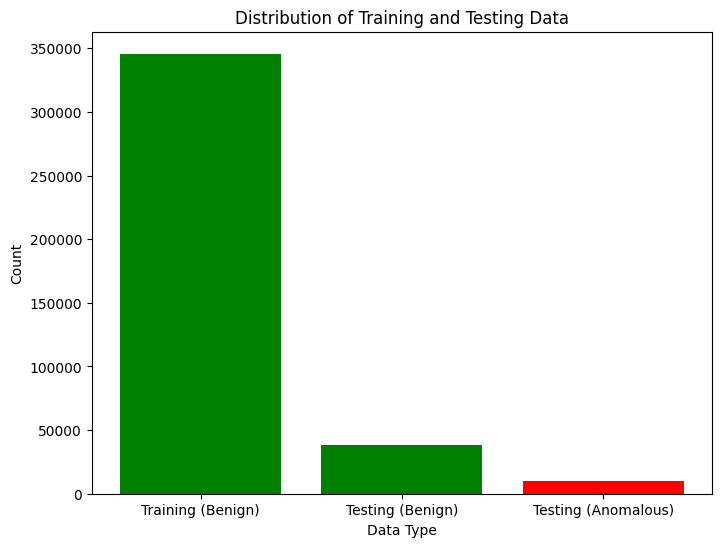

In [7]:
import matplotlib.pyplot as plt

# Count of training and testing data
training_benign_count = x_train_autoencoder.shape[0]
testing_benign_count = x_test_benign_autoencoder.shape[0]
testing_anomalous_count = X_anomalous_autoencoder_test.shape[0]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(["Training (Benign)", "Testing (Benign)", "Testing (Anomalous)"],
        [training_benign_count, testing_benign_count, testing_anomalous_count],
        color=["green", "green", "red"])
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.title("Distribution of Training and Testing Data")
plt.show()


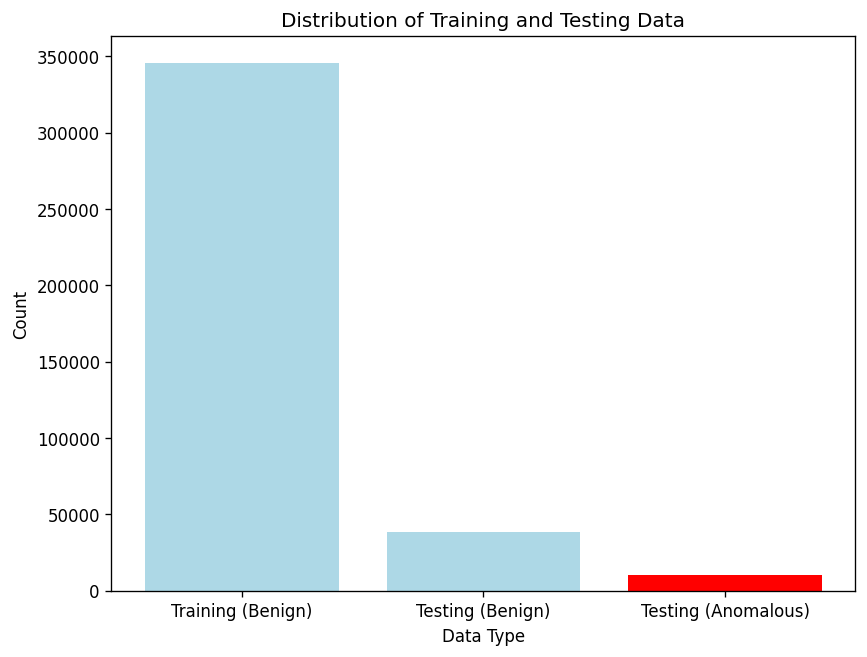

In [17]:
import matplotlib.pyplot as plt

# Count of training and testing data
training_benign_count = x_train_autoencoder.shape[0]
testing_benign_count = x_test_benign_autoencoder.shape[0]
testing_anomalous_count = X_anomalous_autoencoder_test.shape[0]

# Create a bar plot with higher DPI
plt.figure(figsize=(8, 6), dpi=120)  # Increased DPI for better resolution
plt.bar(["Training (Benign)", "Testing (Benign)", "Testing (Anomalous)"],
        [training_benign_count, testing_benign_count, testing_anomalous_count],
        color=["lightblue", "lightblue", "red"])
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.title("Distribution of Training and Testing Data")
plt.show()


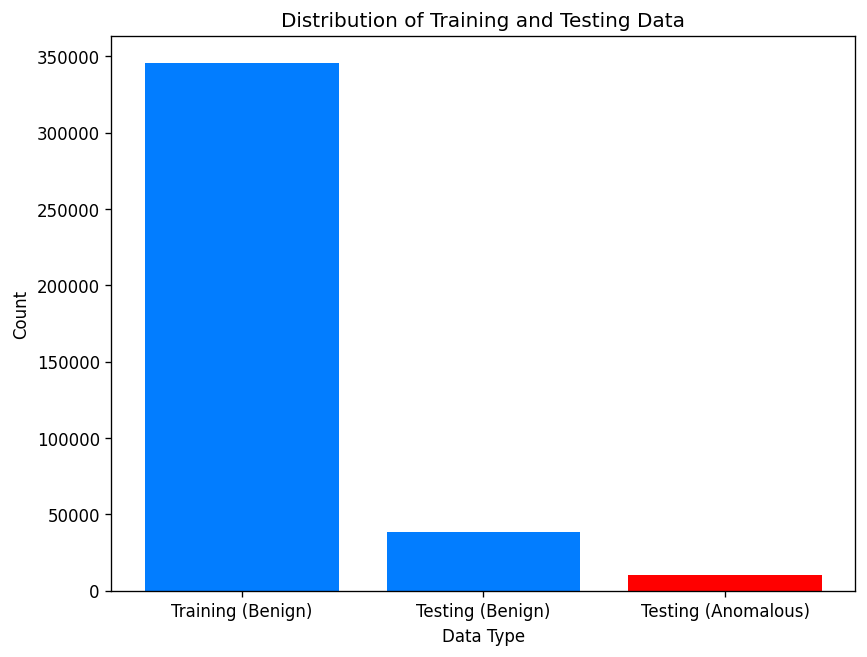

In [18]:
import matplotlib.pyplot as plt

# Count of training and testing data
training_benign_count = x_train_autoencoder.shape[0]
testing_benign_count = x_test_benign_autoencoder.shape[0]
testing_anomalous_count = X_anomalous_autoencoder_test.shape[0]

# Create a bar plot with the specified blue color
plt.figure(figsize=(8, 6), dpi=120)  # Increased DPI for better resolution
plt.bar(["Training (Benign)", "Testing (Benign)", "Testing (Anomalous)"],
        [training_benign_count, testing_benign_count, testing_anomalous_count],
        color=["#027DFF", "#027DFF", "red"])  # Specified hex code for blue
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.title("Distribution of Training and Testing Data")

# Save the figure as a PNG file
plt.savefig('AEdata_distribution.png')

# Display the plot
plt.show()


In [31]:
mse_normal = MeanSquaredLogarithmicError()(x_test_benign_autoencoder, model.predict(x_test_benign_autoencoder))
threshold = mse_normal.numpy()

307/307 [==============================] - 0s 1ms/step


In [33]:
print(threshold)

149.95915


Epoch 1/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0317
Epoch 2/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0094
Epoch 3/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0069
Epoch 4/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0058
Epoch 5/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0052
Epoch 6/30
1351/1351 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 7/30
1351/1351 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 8/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0042
Epoch 9/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0040
Epoch 10/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0039
Epoch 11/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0037
Epoch 12/30
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0036
E

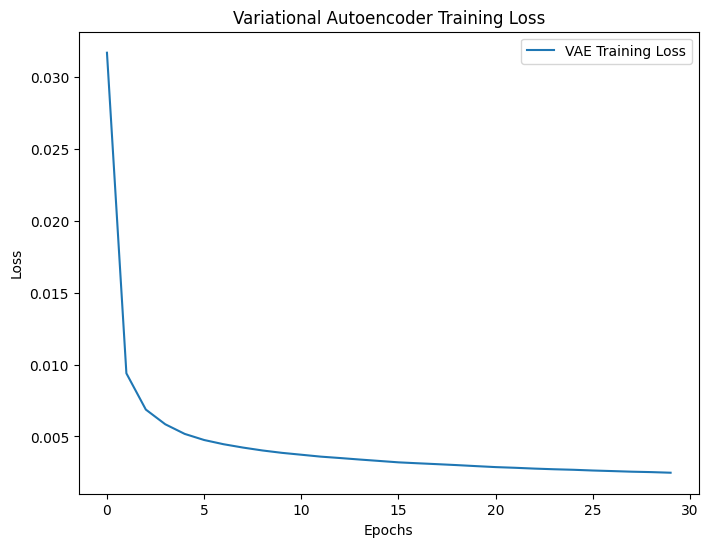

1514/1514 [==============================] - 2s 1ms/step
Accuracy: 0.9985
Confusion Matrix:
 [[38423     0]
 [   73  9927]]
Precision: 0.9985
Recall: 0.9985
F1 Score: 0.9985
ROC-AUC Score: 0.9964
Average Precision Score: 0.9942
Matthews Correlation Coefficient: 0.9954
Cohen's Kappa: 0.9954
Balanced Accuracy: 0.9964
PR AUC: 0.9971
Best Hyperparameters:


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

AX = dp[:, 1:22]
Ay = dp[:, -1]

# Filter benign data

# Filter benign data
X_benign_autoencoder = AX[Ay == 0]

# Split the benign data for training (90%) and testing (10%)
x_train_autoencoder, x_test_benign_autoencoder, _, _ = train_test_split(
    X_benign_autoencoder,
    np.zeros(X_benign_autoencoder.shape[0]),  # Labels are all zeros for benign data
    test_size=0.1,
    stratify=np.zeros(X_benign_autoencoder.shape[0]),
    random_state=42  # Set random state for reproducibility
)

# Randomly select 10,000 anomalous instances with labels from 1 to 7 for testing
X_anomalous_autoencoder_test = AX[(Ay >= 7)]
selected_anomalous_indices = np.random.choice(X_anomalous_autoencoder_test.shape[0], size=10000, replace=False)
X_anomalous_autoencoder_test = X_anomalous_autoencoder_test[selected_anomalous_indices, :]

# Labels: 1 for anomaly, 0 for normal
y_anomalous_autoencoder_test = np.ones(X_anomalous_autoencoder_test.shape[0])

# Combine the benign test data and anomalous test data
x_test_autoencoder = np.vstack([x_test_benign_autoencoder, X_anomalous_autoencoder_test])
y_test_autoencoder = np.concatenate([np.zeros(x_test_benign_autoencoder.shape[0]), y_anomalous_autoencoder_test])

# Scale the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_autoencoder_scaled = min_max_scaler.fit_transform(x_train_autoencoder.copy())
x_test_autoencoder_scaled = min_max_scaler.transform(x_test_autoencoder.copy())

# Build the VAE model
latent_dim = 32  # Set the latent dimension

# Encoder
encoder = Sequential()
encoder.add(Dense(units=256, activation='relu', input_dim=x_train_autoencoder_scaled.shape[1]))
encoder.add(Dropout(rate=0.2))

encoder.add(Dense(units=latent_dim, activation='relu'))  # Latent representation

# Decoder
decoder = Sequential()

decoder.add(Dense(units=96, activation='relu', input_dim=latent_dim))
encoder.add(Dropout(rate=0.3))

decoder.add(Dense(units=x_train_autoencoder_scaled.shape[1], activation='sigmoid'))

# Combine encoder and decoder
vae = Sequential([encoder, decoder])

# Compile the VAE
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
vae.compile(optimizer=optimizer, loss='mean_squared_logarithmic_error')
# Fit the VAE to the entire training data
history_vae = vae.fit(x_train_autoencoder_scaled, x_train_autoencoder_scaled, epochs=30, batch_size=256, shuffle=True, verbose=1)

# Plot the training loss curve for VAE
plt.figure(figsize=(8, 6))
plt.plot(history_vae.history['loss'], label='VAE Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Variational Autoencoder Training Loss')
plt.legend()
plt.show()

# Evaluate on the benign instances
mse_normal = MeanSquaredLogarithmicError()(x_test_benign_autoencoder, model.predict(x_test_benign_autoencoder))
threshold = mse_normal.numpy()

# Convert the reconstruction error to binary predictions (0: benign, 1: anomalous)
reconstruction_error = np.mean(np.square(x_test_autoencoder_scaled - model.predict(x_test_autoencoder_scaled)), axis=1)
y_pred = (reconstruction_error > threshold).astype(int)
# Evaluate performance metrics
accuracy = accuracy_score(y_test_autoencoder, y_pred)
conf_matrix = confusion_matrix(y_test_autoencoder, y_pred)
precision = precision_score(y_test_autoencoder, y_pred, average='weighted')
recall = recall_score(y_test_autoencoder, y_pred, average='weighted')
f1 = f1_score(y_test_autoencoder, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_autoencoder, y_pred)
avg_precision = average_precision_score(y_test_autoencoder, y_pred)
mcc = matthews_corrcoef(y_test_autoencoder, y_pred)
kappa = cohen_kappa_score(y_test_autoencoder, y_pred)
balanced_acc = balanced_accuracy_score(y_test_autoencoder, y_pred)

precision_, recall_, _ = precision_recall_curve(y_test_autoencoder, y_pred)
pr_auc = auc(recall_, precision_)

# Print performance metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC-AUC Score: {:.4f}".format(roc_auc))
print("Average Precision Score: {:.4f}".format(avg_precision))
print("Matthews Correlation Coefficient: {:.4f}".format(mcc))
print("Cohen's Kappa: {:.4f}".format(kappa))
print("Balanced Accuracy: {:.4f}".format(balanced_acc))
print("PR AUC: {:.4f}".format(pr_auc))
print("Best Hyperparameters:")

In [92]:
vae.save('finalvae.h5')

In [53]:
import memory_profiler
def predict_with_memory_profile(model, data):
    predictions = model.predict(data)
    return predictions

# Example usage
predictions = predict_with_memory_profile(AE, x_test_autoencoder_scaled)
print(memory_profiler.memory_usage())

1514/1514 [==============================] - 2s 2ms/step
[4254.42578125]


In [30]:
print(mse_normal)

tf.Tensor(149.95915, shape=(), dtype=float32)


In [54]:
import memory_profiler
def predict_with_memory_profile(model, data):
    predictions = model.predict(data)
    return predictions

# Example usage
predictions = predict_with_memory_profile(vae, x_test_autoencoder_scaled)
print(memory_profiler.memory_usage())

1514/1514 [==============================] - 2s 2ms/step
[4255.90625]


In [49]:
import contextlib
import time
import psutil
from tensorflow.keras.models import load_model  # using TensorFlow/Keras

# Define the context manager with error handling
@contextlib.contextmanager
def measure_cpu_usage(n_runs=5):
  """Context manager to measure CPU usage over multiple runs within its block.

  Args:
      n_runs: The number of times to run the prediction for averaging (default: 5).

  Yields:
      None
  """
  cpu_usage_increases = []
  total_times = []
  for _ in range(n_runs):
    start_time = time.time()
    cpu_usage_before = psutil.cpu_percent()
    try:
      yield
    except Exception as e:  # Catch any exceptions in prediction code
      print(f"Error during prediction: {e}")
    finally:
      cpu_usage_after = psutil.cpu_percent()
      end_time = time.time()
      total_time = end_time - start_time
      cpu_usage_increase = cpu_usage_after - cpu_usage_before
      cpu_usage_increases.append(cpu_usage_increase)
      total_times.append(total_time)

  avg_cpu_usage_increase = sum(cpu_usage_increases) / n_runs
  avg_total_time = sum(total_times) / n_runs

  print(f"Average CPU Usage Increase: {avg_cpu_usage_increase:.2f}% per prediction")
  print(f"Average Total Time per Prediction: {avg_total_time:.2f} seconds")


# Temporary Test (Optional) - Measure CPU usage outside context manager
print("**Test: CPU Usage Outside Context Manager**")
start_time = time.time()
cpu_usage_before = psutil.cpu_percent()
predictions = vae.predict(x_test_autoencoder_scaled)
cpu_usage_after = psutil.cpu_percent()
end_time = time.time()
total_time = end_time - start_time
cpu_usage_increase = cpu_usage_after - cpu_usage_before
print(f"CPU Usage Increase: {cpu_usage_increase:.2f}%")
print(f"Total Time per Prediction: {total_time:.2f} seconds")




**Test: CPU Usage Outside Context Manager**
1514/1514 [==============================] - 2s 2ms/step
CPU Usage Increase: 3.50%
Total Time per Prediction: 3.13 seconds


In [52]:
import contextlib
import time
import psutil
from tensorflow.keras.models import load_model  # 

# Define the context manager with error handling
@contextlib.contextmanager
def measure_cpu_usage(n_runs=5):
  """Context manager to measure CPU usage over multiple runs within its block.

  Args:
      n_runs: The number of times to run the prediction for averaging (default: 5).

  Yields:
      None
  """
  cpu_usage_increases = []
  total_times = []
  for _ in range(n_runs):
    start_time = time.time()
    cpu_usage_before = psutil.cpu_percent()
    try:
      yield
    except Exception as e:  # Catch any exceptions in prediction code
      print(f"Error during prediction: {e}")
    finally:
      cpu_usage_after = psutil.cpu_percent()
      end_time = time.time()
      total_time = end_time - start_time
      cpu_usage_increase = cpu_usage_after - cpu_usage_before
      cpu_usage_increases.append(cpu_usage_increase)
      total_times.append(total_time)

  avg_cpu_usage_increase = sum(cpu_usage_increases) / n_runs
  avg_total_time = sum(total_times) / n_runs

  print(f"Average CPU Usage Increase: {avg_cpu_usage_increase:.2f}% per prediction")
  print(f"Average Total Time per Prediction: {avg_total_time:.2f} seconds")


# Temporary Test (Optional) - Measure CPU usage outside context manager
print("**Test: CPU Usage Outside Context Manager**")
start_time = time.time()
cpu_usage_before = psutil.cpu_percent()
predictions = AE.predict(x_test_autoencoder_scaled)
cpu_usage_after = psutil.cpu_percent()
end_time = time.time()
total_time = end_time - start_time
cpu_usage_increase = cpu_usage_after - cpu_usage_before
print(f"CPU Usage Increase: {cpu_usage_increase:.2f}%")
print(f"Total Time per Prediction: {total_time:.2f} seconds")




**Test: CPU Usage Outside Context Manager**
1514/1514 [==============================] - 2s 2ms/step
CPU Usage Increase: 3.90%
Total Time per Prediction: 3.14 seconds


1514/1514 [==============================] - 2s 2ms/step


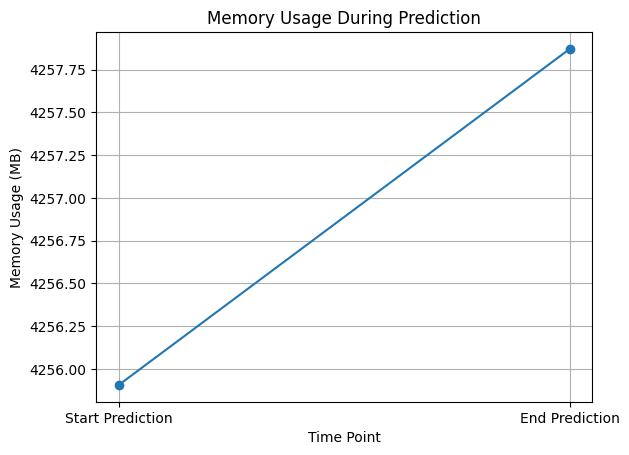

In [55]:
import memory_profiler
import matplotlib.pyplot as plt

def predict_with_memory_profile(model, data):
    # Capture memory usage at the start of prediction
    start_memory = memory_profiler.memory_usage()[0]  #  first element is total memory

    predictions = model.predict(data)

    # Capture memory usage at the end of prediction
    end_memory = memory_profiler.memory_usage()[0]

    return predictions, start_memory, end_memory

# Example usage
predictions, start_memory, end_memory = predict_with_memory_profile(AE, x_test_autoencoder_scaled)

# Plot memory usage ( start_memory and end_memory are in MB)
memory_usage = [start_memory, end_memory]
time_points = ["Start Prediction", "End Prediction"]
plt.plot(time_points, memory_usage, marker='o')
plt.xlabel("Time Point")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage During Prediction")
plt.grid(True)
plt.show()


1514/1514 [==============================] - 2s 2ms/step
Memory usage increased by: 0.28515625 MiB


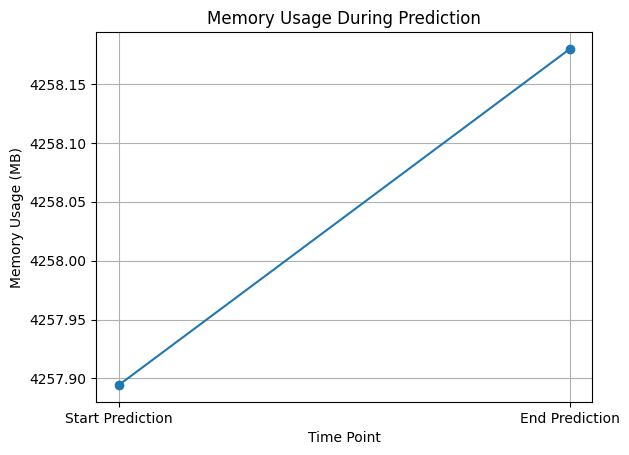

In [56]:
import memory_profiler
import matplotlib.pyplot as plt

def predict_with_memory_profile(model, data):
    # Capture memory usage at the start of prediction
    start_memory = memory_profiler.memory_usage()[0]  #  first element is total memory

    predictions = model.predict(data)

    # Capture memory usage at the end of prediction
    end_memory = memory_profiler.memory_usage()[0]

    # Calculate the difference in memory usage
    memory_difference = end_memory - start_memory

    return predictions, start_memory, end_memory, memory_difference

# Example usage
predictions, start_memory, end_memory, memory_difference = predict_with_memory_profile(AE, x_test_autoencoder_scaled)

# Output the difference in memory usage
print(f"Memory usage increased by: {memory_difference} MiB")

# Plot memory usage ( start_memory and end_memory are in MB)
memory_usage = [start_memory, end_memory]
time_points = ["Start Prediction", "End Prediction"]
plt.plot(time_points, memory_usage, marker='o')
plt.xlabel("Time Point")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage During Prediction")
plt.grid(True)
plt.show()


1514/1514 [==============================] - 2s 1ms/step


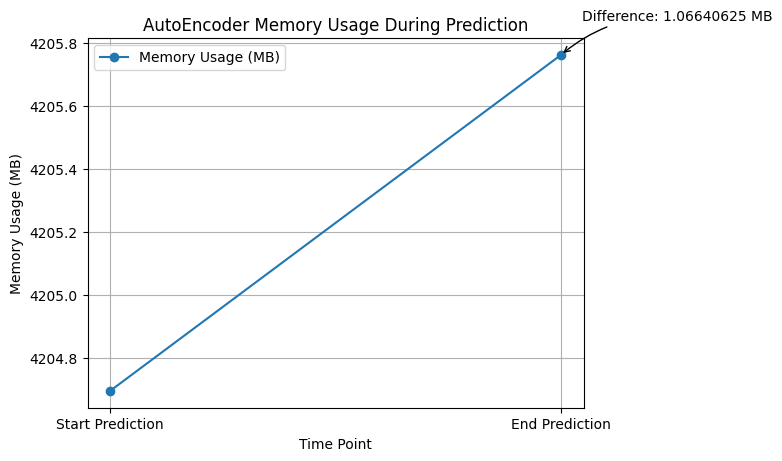

In [90]:
import memory_profiler
import matplotlib.pyplot as plt

def predict_with_memory_profile(model, data):
    # Capture memory usage at the start of prediction
    start_memory = memory_profiler.memory_usage()[0]  #  first element is total memory

    predictions = model.predict(data)

    # Capture memory usage at the end of prediction
    end_memory = memory_profiler.memory_usage()[0]

    # Calculate the difference in memory usage
    memory_difference = end_memory - start_memory

    return predictions, start_memory, end_memory, memory_difference

# Example usage
predictions, start_memory, end_memory, memory_difference = predict_with_memory_profile(AE, x_test_autoencoder_scaled)

# Plot memory usage ( start_memory and end_memory are in MB)
memory_usage = [start_memory, end_memory]
time_points = ["Start Prediction", "End Prediction"]
plt.plot(time_points, memory_usage, marker='o', label='Memory Usage (MB)')

# Annotate the difference in memory usage on the graph
plt.annotate(f'Difference: {memory_difference} MB',
             xy=(1, end_memory), xycoords='data',
             xytext=(15, 25), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))

plt.xlabel("Time Point")
plt.ylabel("Memory Usage (MB)")
plt.title("AutoEncoder Memory Usage During Prediction")
plt.legend()
plt.grid(True)
plt.show()


1514/1514 [==============================] - 2s 1ms/step


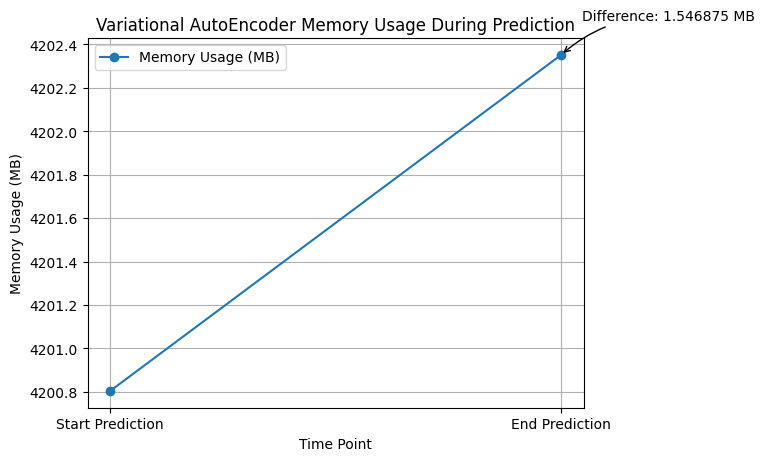

In [88]:
import memory_profiler
import matplotlib.pyplot as plt

def predict_with_memory_profile(model, data):
    # Capture memory usage at the start of prediction
    start_memory = memory_profiler.memory_usage()[0]  #  first element is total memory

    predictions = model.predict(data)

    # Capture memory usage at the end of prediction
    end_memory = memory_profiler.memory_usage()[0]

    # Calculate the difference in memory usage
    memory_difference = end_memory - start_memory

    return predictions, start_memory, end_memory, memory_difference

# Example usage
predictions, start_memory, end_memory, memory_difference = predict_with_memory_profile(vae, x_test_autoencoder_scaled)

# Plot memory usage ( start_memory and end_memory are in MB)
memory_usage = [start_memory, end_memory]
time_points = ["Start Prediction", "End Prediction"]
plt.plot(time_points, memory_usage, marker='o', label='Memory Usage (MB)')

# Annotate the difference in memory usage on the graph
plt.annotate(f'Difference: {memory_difference} MB',
             xy=(1, end_memory), xycoords='data',
             xytext=(15, 25), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))

plt.xlabel("Time Point")
plt.ylabel("Memory Usage (MB)")
plt.title("Variational AutoEncoder Memory Usage During Prediction")
plt.legend()
plt.grid(True)
plt.show()


1514/1514 [==============================] - 2s 1ms/step


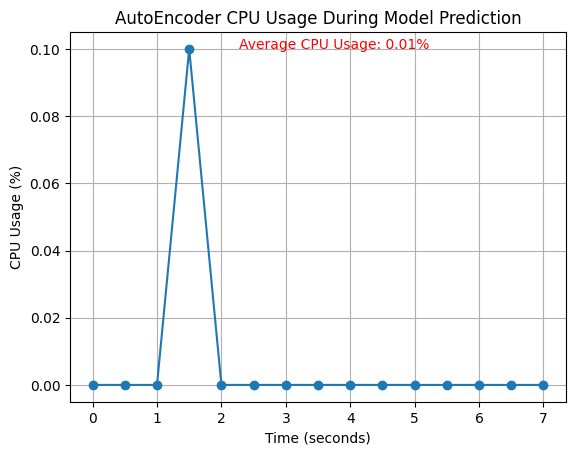

In [78]:
import psutil
import matplotlib.pyplot as plt
import time

def predict(model, data):
    return model.predict(data)

# Function to record CPU usage during prediction
def record_cpu_usage_during_prediction(model, data, interval, duration):
    cpu_usage = []
    start_time = time.time()

    # Start the prediction and record CPU usage
    predictions = predict(model, data)
    while (time.time() - start_time) < duration:
        cpu_usage.append(psutil.cpu_percent(interval=interval))
    
    return predictions, cpu_usage

# Function to plot CPU usage
def plot_cpu_usage(cpu_usage, interval):
    # Calculate the average CPU usage
    average_cpu_usage = sum(cpu_usage) / len(cpu_usage)
    
    plt.plot([i * interval for i in range(len(cpu_usage))], cpu_usage, marker='o')
    plt.xlabel("Time (seconds)")
    plt.ylabel("CPU Usage (%)")
    plt.title("AutoEncoder CPU Usage During Model Prediction")
    
    # Print the average CPU usage on the graph
    plt.text(len(cpu_usage) * interval / 2, max(cpu_usage), f'Average CPU Usage: {average_cpu_usage:.2f}%', 
             horizontalalignment='center', color='red')
    
    plt.grid(True)
    plt.show()

# Example usage
# Record CPU usage every 0.5 seconds for the total duration of the prediction
predictions, cpu_usage = record_cpu_usage_during_prediction(AE, x_test_autoencoder_scaled, 0.5, 10)

# Plot the recorded CPU usage
plot_cpu_usage(cpu_usage, 0.5)


1514/1514 [==============================] - 1s 961us/step


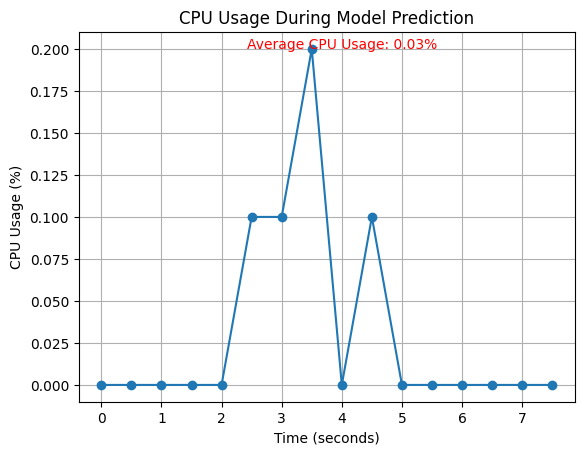

In [66]:
import psutil
import matplotlib.pyplot as plt
import time

#  model prediction function
def predict(model, data):
    return model.predict(data)

# Function to record CPU usage during prediction
def record_cpu_usage_during_prediction(model, data, interval, duration):
    cpu_usage = []
    start_time = time.time()

    # Start the prediction and record CPU usage
    predictions = predict(model, data)
    while (time.time() - start_time) < duration:
        cpu_usage.append(psutil.cpu_percent(interval=interval))
    
    return predictions, cpu_usage

# Function to plot CPU usage
def plot_cpu_usage(cpu_usage, interval):
    # Calculate the average CPU usage
    average_cpu_usage = sum(cpu_usage) / len(cpu_usage)
    
    plt.plot([i * interval for i in range(len(cpu_usage))], cpu_usage, marker='o')
    plt.xlabel("Time (seconds)")
    plt.ylabel("CPU Usage (%)")
    plt.title("Varional AutoEncoder CPU Usage During Model Prediction")
    
    # Print the average CPU usage on the graph
    plt.text(len(cpu_usage) * interval / 2, max(cpu_usage), f'Average CPU Usage: {average_cpu_usage:.2f}%', 
             horizontalalignment='center', color='red')
    
    plt.grid(True)
    plt.show()

# Example usage
# Record CPU usage every 0.5 seconds for the total duration of the prediction
predictions, cpu_usage = record_cpu_usage_during_prediction(vae, x_test_autoencoder_scaled, 0.5, 10)

# Plot the recorded CPU usage
plot_cpu_usage(cpu_usage, 0.5)


1514/1514 [==============================] - 1s 962us/step


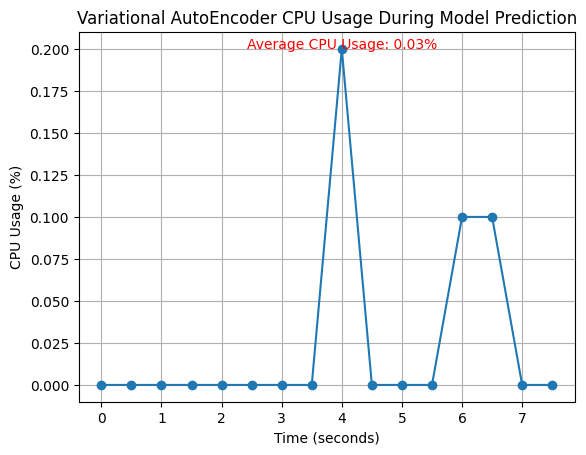

In [87]:
import psutil
import matplotlib.pyplot as plt
import time

#  model prediction function
def predict(model, data):
    return model.predict(data)

# Function to record CPU usage during prediction
def record_cpu_usage_during_prediction(model, data, interval, duration):
    cpu_usage = []
    start_time = time.time()

    # Start the prediction and record CPU usage
    predictions = predict(model, data)
    while (time.time() - start_time) < duration:
        cpu_usage.append(psutil.cpu_percent(interval=interval))
    
    return predictions, cpu_usage

# Function to plot CPU usage
def plot_cpu_usage(cpu_usage, interval):
    # Calculate the average CPU usage
    average_cpu_usage = sum(cpu_usage) / len(cpu_usage)
    
    plt.plot([i * interval for i in range(len(cpu_usage))], cpu_usage, marker='o')
    plt.xlabel("Time (seconds)")
    plt.ylabel("CPU Usage (%)")
    plt.title("Variational AutoEncoder CPU Usage During Model Prediction")
    
    # Print the average CPU usage on the graph
    plt.text(len(cpu_usage) * interval / 2, max(cpu_usage), f'Average CPU Usage: {average_cpu_usage:.2f}%', 
             horizontalalignment='center', color='red')
    
    plt.grid(True)
    plt.show()

# Example usage
# Record CPU usage every 0.5 seconds for the total duration of the prediction
predictions, cpu_usage = record_cpu_usage_during_prediction(vae, x_test_autoencoder_scaled, 0.5, 10)

# Plot the recorded CPU usage
plot_cpu_usage(cpu_usage, 0.5)


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score, precision_recall_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from kerastuner.tuners import BayesianOptimization

# Extract features (X) and labels (Y)
AX = dp[:, 1:22]
Ay = dp[:, -1]

# Filter benign data
X_benign_autoencoder = AX[Ay == 0]

# Split the benign data for training (90%) and testing (10%)
x_train_autoencoder, x_test_benign_autoencoder, _, _ = train_test_split(
    X_benign_autoencoder,
    np.zeros(X_benign_autoencoder.shape[0]),  # Labels are all zeros for benign data
    test_size=0.1,
    stratify=np.zeros(X_benign_autoencoder.shape[0]),
    random_state=42  # Set random state for reproducibility
)

# Randomly select 10,000 anomalous instances with labels from 1 to 7 for testing
X_anomalous_autoencoder_test = AX[(Ay >= 7)]
selected_anomalous_indices = np.random.choice(X_anomalous_autoencoder_test.shape[0], size=10000, replace=False)
X_anomalous_autoencoder_test = X_anomalous_autoencoder_test[selected_anomalous_indices, :]

# Labels: 1 for anomaly, 0 for normal
y_anomalous_autoencoder_test = np.ones(X_anomalous_autoencoder_test.shape[0])

# Combine the benign test data and anomalous test data
x_test_autoencoder = np.vstack([x_test_benign_autoencoder, X_anomalous_autoencoder_test])
y_test_autoencoder = np.concatenate([np.zeros(x_test_benign_autoencoder.shape[0]), y_anomalous_autoencoder_test])

# Scale the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_autoencoder_scaled = min_max_scaler.fit_transform(x_train_autoencoder.copy())
x_test_autoencoder_scaled = min_max_scaler.transform(x_test_autoencoder.copy())

# Build a simpler AutoEncoder model with regularization
input_dim = x_train_autoencoder_scaled.shape[1]

# Define a function for hyperparameter tuning
def build_model(hp):
    AEmodel = Sequential()
    AEmodel.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu', input_dim=input_dim))
    AEmodel.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    AEmodel.add(Dense(units=hp.Int('units_2', min_value=16, max_value=128, step=16), activation='relu'))
    AEmodel.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    AEmodel.add(Dense(input_dim, activation='sigmoid'))

    # Include learning rate as a hyperparameter
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])  # 
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    AEmodel.compile(optimizer=optimizer, loss='mean_squared_logarithmic_error')
    return AEmodel

# Perform hyperparameter tuning


# Perform hyperparameter tuning using Bayesian Optimization
Autoencodertuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=30,
    num_initial_points=2,  #  
    directory='AET',
    project_name='AET',  # Change to a new project name
    overwrite=False  # Add this line
)

# Split data for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(x_train_autoencoder_scaled)):
    x_train_fold, x_val_fold = x_train_autoencoder_scaled[train_index], x_train_autoencoder_scaled[val_index]

    Autoencodertuner.search(x_train_fold, x_train_fold,
                 epochs=30,
                 validation_data=(x_val_fold, x_val_fold),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Get the best hyperparameters
best_hps = Autoencodertuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model with the best hyperparameters
final_modelAE = Autoencodertuner.hypermodel.build(best_hps)

# Fit the model to the entire training data
final_modelAE.fit(x_train_autoencoder_scaled, x_train_autoencoder_scaled, epochs=30, batch_size=256, shuffle=True)

# Evaluate on the benign instances
mse_normal = MeanSquaredLogarithmicError()(x_test_benign_autoencoder, final_modelAE.predict(x_test_benign_autoencoder))
threshold = mse_normal.numpy()

# Convert the reconstruction error to binary predictions (0: benign, 1: anomalous)
reconstruction_error = np.mean(np.square(x_test_autoencoder_scaled - final_modelAE.predict(x_test_autoencoder_scaled)), axis=1)
y_pred = (reconstruction_error > threshold).astype(int)

# Evaluate performance metrics
accuracy = accuracy_score(y_test_autoencoder, y_pred)
conf_matrix = confusion_matrix(y_test_autoencoder, y_pred)
precision = precision_score(y_test_autoencoder, y_pred, average='weighted')
recall = recall_score(y_test_autoencoder, y_pred, average='weighted')
f1 = f1_score(y_test_autoencoder, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_autoencoder, y_pred)
avg_precision = average_precision_score(y_test_autoencoder, y_pred)
mcc = matthews_corrcoef(y_test_autoencoder, y_pred)
kappa = cohen_kappa_score(y_test_autoencoder, y_pred)
balanced_acc = balanced_accuracy_score(y_test_autoencoder, y_pred)

precision_, recall_, _ = precision_recall_curve(y_test_autoencoder, y_pred)
pr_auc = auc(recall_, precision_)

# Print performance metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC-AUC Score: {:.4f}".format(roc_auc))
print("Average Precision Score: {:.4f}".format(avg_precision))
print("Matthews Correlation Coefficient: {:.4f}".format(mcc))
print("Cohen's Kappa: {:.4f}".format(kappa))
print("Balanced Accuracy: {:.4f}".format(balanced_acc))
print("PR AUC: {:.4f}".format(pr_auc))
print("Best Hyperparameters:")
print("units_1:", best_hps.get('units_1'))
print("dropout_1:", best_hps.get('dropout_1'))
print("units_2:", best_hps.get('units_2'))
print("dropout_2:", best_hps.get('dropout_2'))
print("learning_rate:", best_hps.get('learning_rate'))

Reloading Tuner from AET/AET/tuner0.json
Epoch 1/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0096
Epoch 2/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0063
Epoch 3/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 4/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 5/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 6/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 7/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 8/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0054
Epoch 9/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0054
Epoch 10/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0054
Epoch 11/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0054
Epoch 12/30
1351/1351 [=====================

Epoch 1/30
1351/1351 [==============================] - 6s 4ms/step - loss: 0.0065
Epoch 2/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0032
Epoch 3/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0028
Epoch 4/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0026
Epoch 5/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0026
Epoch 6/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0025
Epoch 7/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0025
Epoch 8/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0025
Epoch 9/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0025
Epoch 10/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0024
Epoch 11/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0023
Epoch 12/30
1351/1351 [==============================] - 5s 4ms/step - loss: 0.0024
E

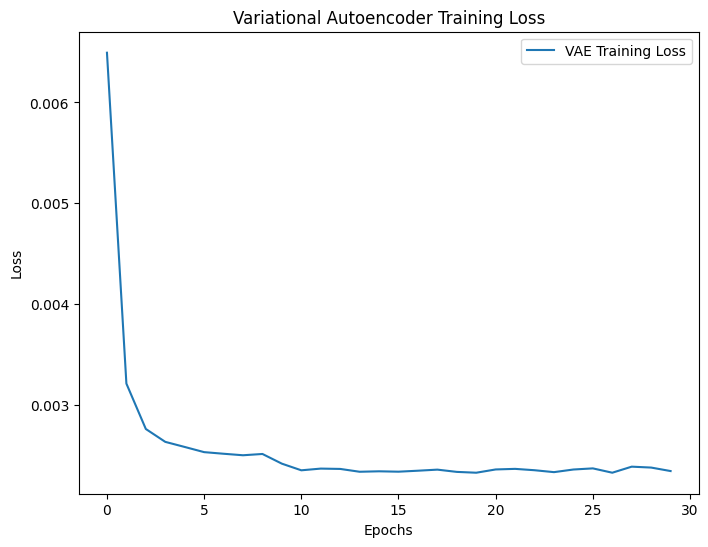

1514/1514 [==============================] - 2s 989us/step
Accuracy: 0.9983
Confusion Matrix:
 [[38423     0]
 [   80  9920]]
Precision: 0.9984
Recall: 0.9983
F1 Score: 0.9983
ROC-AUC Score: 0.9960
Average Precision Score: 0.9937
Matthews Correlation Coefficient: 0.9950
Cohen's Kappa: 0.9949
Balanced Accuracy: 0.9960
PR AUC: 0.9968
Best Hyperparameters:


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

AX = dp[:, 1:22]
Ay = dp[:, -1]

# Filter benign data

# Filter benign data
X_benign_autoencoder = AX[Ay == 0]

# Split the benign data for training (90%) and testing (10%)
x_train_autoencoder, x_test_benign_autoencoder, _, _ = train_test_split(
    X_benign_autoencoder,
    np.zeros(X_benign_autoencoder.shape[0]),  # Labels are all zeros for benign data
    test_size=0.1,
    stratify=np.zeros(X_benign_autoencoder.shape[0]),
    random_state=42  # Set random state for reproducibility
)

# Randomly select 10,000 anomalous instances with labels from 1 to 7 for testing
X_anomalous_autoencoder_test = AX[(Ay >= 7)]
selected_anomalous_indices = np.random.choice(X_anomalous_autoencoder_test.shape[0], size=10000, replace=False)
X_anomalous_autoencoder_test = X_anomalous_autoencoder_test[selected_anomalous_indices, :]

# Labels: 1 for anomaly, 0 for normal
y_anomalous_autoencoder_test = np.ones(X_anomalous_autoencoder_test.shape[0])

# Combine the benign test data and anomalous test data
x_test_autoencoder = np.vstack([x_test_benign_autoencoder, X_anomalous_autoencoder_test])
y_test_autoencoder = np.concatenate([np.zeros(x_test_benign_autoencoder.shape[0]), y_anomalous_autoencoder_test])

# Scale the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_autoencoder_scaled = min_max_scaler.fit_transform(x_train_autoencoder.copy())
x_test_autoencoder_scaled = min_max_scaler.transform(x_test_autoencoder.copy())

# Build the VAE model
latent_dim = 32  # Set the latent dimension

# Encoder
encoder = Sequential()
encoder.add(Dense(units=128, activation='relu', input_dim=x_train_autoencoder_scaled.shape[1]))
encoder.add(Dropout(rate=0.30000000000000004))

encoder.add(Dense(units=latent_dim, activation='relu'))  # Latent representation

# Decoder
decoder = Sequential()

decoder.add(Dense(units=16, activation='relu', input_dim=latent_dim))
encoder.add(Dropout(rate=0.2))

decoder.add(Dense(units=x_train_autoencoder_scaled.shape[1], activation='sigmoid'))

# Combine encoder and decoder
vae = Sequential([encoder, decoder])

# Compile the VAE
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
vae.compile(optimizer=optimizer, loss='mean_squared_logarithmic_error')
# Fit the VAE to the entire training data
history_vae = vae.fit(x_train_autoencoder_scaled, x_train_autoencoder_scaled, epochs=30, batch_size=256, shuffle=True, verbose=1)

# Plot the training loss curve for VAE
plt.figure(figsize=(8, 6))
plt.plot(history_vae.history['loss'], label='VAE Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Variational Autoencoder Training Loss')
plt.legend()
plt.show()

# Evaluate on the benign instances
mse_normal = MeanSquaredLogarithmicError()(x_test_benign_autoencoder, vae.predict(x_test_benign_autoencoder))
threshold = mse_normal.numpy()

# Convert the reconstruction error to binary predictions (0: benign, 1: anomalous)
reconstruction_error = np.mean(np.square(x_test_autoencoder_scaled - vae.predict(x_test_autoencoder_scaled)), axis=1)
y_pred = (reconstruction_error > threshold).astype(int)
# Evaluate performance metrics
accuracy = accuracy_score(y_test_autoencoder, y_pred)
conf_matrix = confusion_matrix(y_test_autoencoder, y_pred)
precision = precision_score(y_test_autoencoder, y_pred, average='weighted')
recall = recall_score(y_test_autoencoder, y_pred, average='weighted')
f1 = f1_score(y_test_autoencoder, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_autoencoder, y_pred)
avg_precision = average_precision_score(y_test_autoencoder, y_pred)
mcc = matthews_corrcoef(y_test_autoencoder, y_pred)
kappa = cohen_kappa_score(y_test_autoencoder, y_pred)
balanced_acc = balanced_accuracy_score(y_test_autoencoder, y_pred)

precision_, recall_, _ = precision_recall_curve(y_test_autoencoder, y_pred)
pr_auc = auc(recall_, precision_)

# Print performance metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC-AUC Score: {:.4f}".format(roc_auc))
print("Average Precision Score: {:.4f}".format(avg_precision))
print("Matthews Correlation Coefficient: {:.4f}".format(mcc))
print("Cohen's Kappa: {:.4f}".format(kappa))
print("Balanced Accuracy: {:.4f}".format(balanced_acc))
print("PR AUC: {:.4f}".format(pr_auc))
print("Best Hyperparameters:")

Epoch 1/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0112
Epoch 2/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0065
Epoch 3/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0058
Epoch 4/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0057
Epoch 5/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0056
Epoch 6/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 7/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0055
Epoch 8/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0055
Epoch 9/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 10/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0055
Epoch 11/30
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 12/30
1351/1351 [==============================] - 5s 3ms/step - loss: 0.0055
E

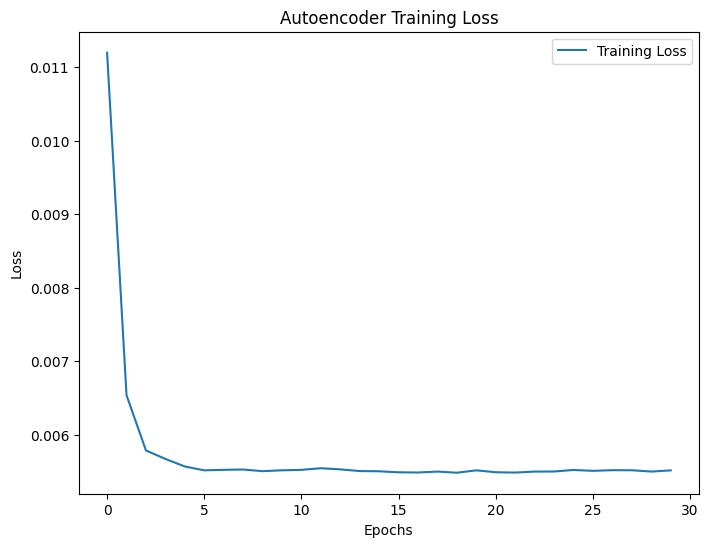

1514/1514 [==============================] - 2s 994us/step
Accuracy: 0.9986
Confusion Matrix:
 [[38423     0]
 [   69  9931]]
Precision: 0.9986
Recall: 0.9986
F1 Score: 0.9986
ROC-AUC Score: 0.9966
Average Precision Score: 0.9945
Matthews Correlation Coefficient: 0.9957
Cohen's Kappa: 0.9956
Balanced Accuracy: 0.9966
PR AUC: 0.9973
Best Hyperparameters:


In [8]:
# Stage 2 Models Evaluation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score, precision_recall_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredLogarithmicError
np.random.seed(42)
tf.random.set_seed(42)
# Extract features (X) and labels (Y)
AX = dp[:, 1:22]
Ay = dp[:, -1]

# Filter benign data
X_benign_autoencoder = AX[Ay == 0]

# Split the benign data for training (90%) and testing (10%)
x_train_autoencoder, x_test_benign_autoencoder, _, _ = train_test_split(
    X_benign_autoencoder,
    np.zeros(X_benign_autoencoder.shape[0]),  # Labels are all zeros for benign data
    test_size=0.1,
    stratify=np.zeros(X_benign_autoencoder.shape[0]),
    random_state=42  # Set random state for reproducibility
)

# Randomly select 10,000 anomalous instances with labels from 1 to 7 for testing
X_anomalous_autoencoder_test = AX[(Ay >= 7)]
selected_anomalous_indices = np.random.choice(X_anomalous_autoencoder_test.shape[0], size=10000, replace=False)
X_anomalous_autoencoder_test = X_anomalous_autoencoder_test[selected_anomalous_indices, :]

# Labels: 1 for anomaly, 0 for normal
y_anomalous_autoencoder_test = np.ones(X_anomalous_autoencoder_test.shape[0])

# Combine the benign test data and anomalous test data
x_test_autoencoder = np.vstack([x_test_benign_autoencoder, X_anomalous_autoencoder_test])
y_test_autoencoder = np.concatenate([np.zeros(x_test_benign_autoencoder.shape[0]), y_anomalous_autoencoder_test])

# Scale the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_autoencoder_scaled = min_max_scaler.fit_transform(x_train_autoencoder.copy())
x_test_autoencoder_scaled = min_max_scaler.transform(x_test_autoencoder.copy())

# Build the model with the best hyperparameters
AE = Sequential()
AE.add(Dense(units=128, activation='relu', input_dim=x_train_autoencoder_scaled.shape[1]))
AE.add(Dropout(rate=0.30000000000000004))

AE.add(Dense(units=16, activation='relu'))
AE.add(Dropout(rate=0.2))
AE.add(Dense(x_train_autoencoder_scaled.shape[1], activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
AE.compile(optimizer=optimizer, loss='mean_squared_logarithmic_error')

# Fit the model to the entire training data
#model.fit(x_train_autoencoder_scaled, x_train_autoencoder_scaled, epochs=30, batch_size=256, shuffle=True)
history = AE.fit(x_train_autoencoder_scaled, x_train_autoencoder_scaled, epochs=30, batch_size=256, shuffle=True, verbose=1)

# Plot the training loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.show()

# Evaluate on the benign instances
mse_normal = MeanSquaredLogarithmicError()(x_test_benign_autoencoder, AE.predict(x_test_benign_autoencoder))
threshold = mse_normal.numpy()

# Convert the reconstruction error to binary predictions (0: benign, 1: anomalous)
reconstruction_error = np.mean(np.square(x_test_autoencoder_scaled - AE.predict(x_test_autoencoder_scaled)), axis=1)
y_pred = (reconstruction_error > threshold).astype(int)

# Evaluate performance metrics
accuracy = accuracy_score(y_test_autoencoder, y_pred)
conf_matrix = confusion_matrix(y_test_autoencoder, y_pred)
precision = precision_score(y_test_autoencoder, y_pred, average='weighted')
recall = recall_score(y_test_autoencoder, y_pred, average='weighted')
f1 = f1_score(y_test_autoencoder, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_autoencoder, y_pred)
avg_precision = average_precision_score(y_test_autoencoder, y_pred)
mcc = matthews_corrcoef(y_test_autoencoder, y_pred)
kappa = cohen_kappa_score(y_test_autoencoder, y_pred)
balanced_acc = balanced_accuracy_score(y_test_autoencoder, y_pred)

precision_, recall_, _ = precision_recall_curve(y_test_autoencoder, y_pred)
pr_auc = auc(recall_, precision_)

# Print performance metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC-AUC Score: {:.4f}".format(roc_auc))
print("Average Precision Score: {:.4f}".format(avg_precision))
print("Matthews Correlation Coefficient: {:.4f}".format(mcc))
print("Cohen's Kappa: {:.4f}".format(kappa))
print("Balanced Accuracy: {:.4f}".format(balanced_acc))
print("PR AUC: {:.4f}".format(pr_auc))
print("Best Hyperparameters:")


In [ ]:
AE.predict(x_test_autoencoder_scaled)
vae.predict(x_test_autoencoder_scaled)


1514/1514 [==============================] - 1s 923us/step


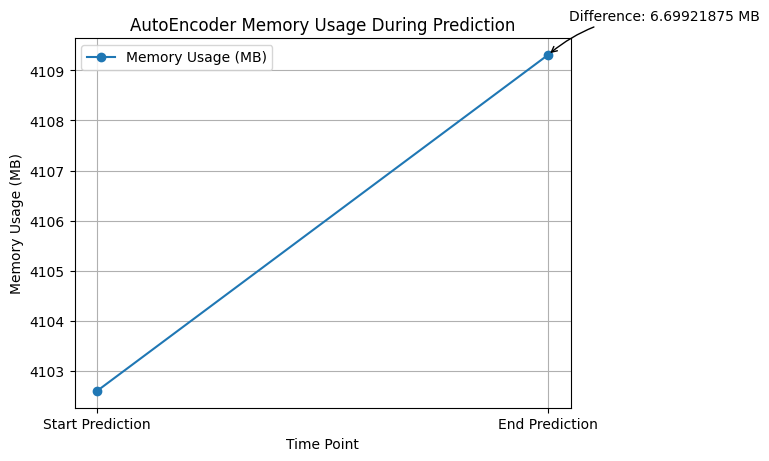

In [11]:
import memory_profiler
import matplotlib.pyplot as plt

def predict_with_memory_profile(model, data):
    # Capture memory usage at the start of prediction
    start_memory = memory_profiler.memory_usage()[0]  #  first element is total memory

    predictions = model.predict(data)

    # Capture memory usage at the end of prediction
    end_memory = memory_profiler.memory_usage()[0]

    # Calculate the difference in memory usage
    memory_difference = end_memory - start_memory

    return predictions, start_memory, end_memory, memory_difference

# Example usage
predictions, start_memory, end_memory, memory_difference = predict_with_memory_profile(AE, x_test_autoencoder_scaled)

# Plot memory usage ( start_memory and end_memory are in MB)
memory_usage = [start_memory, end_memory]
time_points = ["Start Prediction", "End Prediction"]
plt.plot(time_points, memory_usage, marker='o', label='Memory Usage (MB)')

# Annotate the difference in memory usage on the graph
plt.annotate(f'Difference: {memory_difference} MB',
             xy=(1, end_memory), xycoords='data',
             xytext=(15, 25), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))

plt.xlabel("Time Point")
plt.ylabel("Memory Usage (MB)")
plt.title("AutoEncoder Memory Usage During Prediction")
plt.legend()
plt.grid(True)
plt.show()


1514/1514 [==============================] - 2s 1ms/step


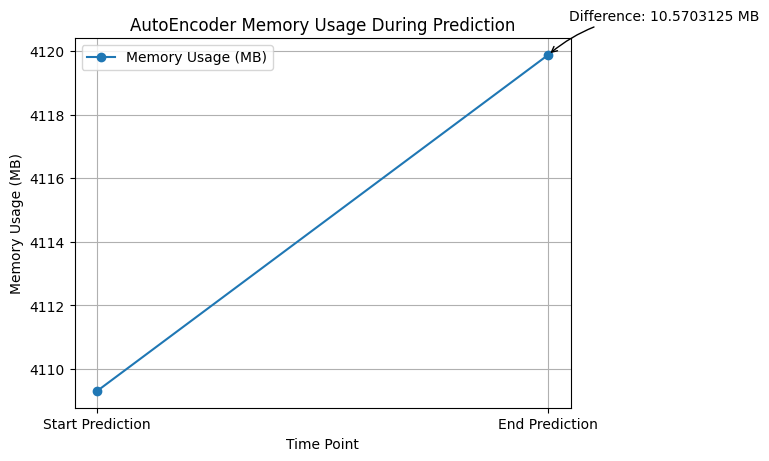

In [12]:
import memory_profiler
import matplotlib.pyplot as plt

def predict_with_memory_profile(model, data):
    # Capture memory usage at the start of prediction
    start_memory = memory_profiler.memory_usage()[0]  #  first element is total memory

    predictions = model.predict(data)

    # Capture memory usage at the end of prediction
    end_memory = memory_profiler.memory_usage()[0]

    # Calculate the difference in memory usage
    memory_difference = end_memory - start_memory

    return predictions, start_memory, end_memory, memory_difference

# Example usage
predictions, start_memory, end_memory, memory_difference = predict_with_memory_profile(vae, x_test_autoencoder_scaled)

# Plot memory usage ( start_memory and end_memory are in MB)
memory_usage = [start_memory, end_memory]
time_points = ["Start Prediction", "End Prediction"]
plt.plot(time_points, memory_usage, marker='o', label='Memory Usage (MB)')

# Annotate the difference in memory usage on the graph
plt.annotate(f'Difference: {memory_difference} MB',
             xy=(1, end_memory), xycoords='data',
             xytext=(15, 25), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))

plt.xlabel("Time Point")
plt.ylabel("Memory Usage (MB)")
plt.title("AutoEncoder Memory Usage During Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import contextlib
import time
import psutil
from tensorflow.keras.models import load_model  #   using TensorFlow/Keras

# Define the context manager with error handling
@contextlib.contextmanager
def measure_cpu_usage(n_runs=5):
  """Context manager to measure CPU usage over multiple runs within its block.

  Args:
      n_runs: The number of times to run the prediction for averaging (default: 5).

  Yields:
      None
  """
  cpu_usage_increases = []
  total_times = []
  for _ in range(n_runs):
    start_time = time.time()
    cpu_usage_before = psutil.cpu_percent()
    try:
      yield
    except Exception as e:  # Catch any exceptions in prediction code
      print(f"Error during prediction: {e}")
    finally:
      cpu_usage_after = psutil.cpu_percent()
      end_time = time.time()
      total_time = end_time - start_time
      cpu_usage_increase = cpu_usage_after - cpu_usage_before
      cpu_usage_increases.append(cpu_usage_increase)
      total_times.append(total_time)

  avg_cpu_usage_increase = sum(cpu_usage_increases) / n_runs
  avg_total_time = sum(total_times) / n_runs

  print(f"Average CPU Usage Increase: {avg_cpu_usage_increase:.2f}% per prediction")
  print(f"Average Total Time per Prediction: {avg_total_time:.2f} seconds")


# Temporary Test (Optional) - Measure CPU usage outside context manager
print("**Test: CPU Usage Outside Context Manager**")
start_time = time.time()
cpu_usage_before = psutil.cpu_percent()
predictions = AE.predict(x_test_autoencoder_scaled)
cpu_usage_after = psutil.cpu_percent()
end_time = time.time()
total_time = end_time - start_time
cpu_usage_increase = cpu_usage_after - cpu_usage_before
print(f"CPU Usage Increase: {cpu_usage_increase:.2f}%")
print(f"Total Time per Prediction: {total_time:.2f} seconds")


In [13]:
import contextlib
import time
import psutil
from tensorflow.keras.models import load_model  # 

# Define the context manager with error handling
@contextlib.contextmanager
def measure_cpu_usage(n_runs=5):
  """Context manager to measure CPU usage over multiple runs within its block.

  Args:
      n_runs: The number of times to run the prediction for averaging (default: 5).

  Yields:
      None
  """
  cpu_usage_increases = []
  total_times = []
  for _ in range(n_runs):
    start_time = time.time()
    cpu_usage_before = psutil.cpu_percent()
    try:
      yield
    except Exception as e:  # Catch any exceptions in prediction code
      print(f"Error during prediction: {e}")
    finally:
      cpu_usage_after = psutil.cpu_percent()
      end_time = time.time()
      total_time = end_time - start_time
      cpu_usage_increase = cpu_usage_after - cpu_usage_before
      cpu_usage_increases.append(cpu_usage_increase)
      total_times.append(total_time)

  avg_cpu_usage_increase = sum(cpu_usage_increases) / n_runs
  avg_total_time = sum(total_times) / n_runs

  print(f"Average CPU Usage Increase: {avg_cpu_usage_increase:.2f}% per prediction")
  print(f"Average Total Time per Prediction: {avg_total_time:.2f} seconds")


# Temporary Test (Optional) - Measure CPU usage outside context manager
print("**Test: CPU Usage Outside Context Manager**")
start_time = time.time()
cpu_usage_before = psutil.cpu_percent()
predictions = AE.predict(x_test_autoencoder_scaled)
cpu_usage_after = psutil.cpu_percent()
end_time = time.time()
total_time = end_time - start_time
cpu_usage_increase = cpu_usage_after - cpu_usage_before
print(f"CPU Usage Increase: {cpu_usage_increase:.2f}%")
print(f"Total Time per Prediction: {total_time:.2f} seconds")

**Test: CPU Usage Outside Context Manager**
1514/1514 [==============================] - 2s 1ms/step
CPU Usage Increase: 1.60%
Total Time per Prediction: 2.09 seconds


In [14]:
import contextlib
import time
import psutil
from tensorflow.keras.models import load_model  # 

# Define the context manager with error handling
@contextlib.contextmanager
def measure_cpu_usage(n_runs=5):
  """Context manager to measure CPU usage over multiple runs within its block.

  Args:
      n_runs: The number of times to run the prediction for averaging (default: 5).

  Yields:
      None
  """
  cpu_usage_increases = []
  total_times = []
  for _ in range(n_runs):
    start_time = time.time()
    cpu_usage_before = psutil.cpu_percent()
    try:
      yield
    except Exception as e:  # Catch any exceptions in prediction code
      print(f"Error during prediction: {e}")
    finally:
      cpu_usage_after = psutil.cpu_percent()
      end_time = time.time()
      total_time = end_time - start_time
      cpu_usage_increase = cpu_usage_after - cpu_usage_before
      cpu_usage_increases.append(cpu_usage_increase)
      total_times.append(total_time)

  avg_cpu_usage_increase = sum(cpu_usage_increases) / n_runs
  avg_total_time = sum(total_times) / n_runs

  print(f"Average CPU Usage Increase: {avg_cpu_usage_increase:.2f}% per prediction")
  print(f"Average Total Time per Prediction: {avg_total_time:.2f} seconds")


# Temporary Test (Optional) - Measure CPU usage outside context manager
print("**Test: CPU Usage Outside Context Manager**")
start_time = time.time()
cpu_usage_before = psutil.cpu_percent()
predictions = vae.predict(x_test_autoencoder_scaled)
cpu_usage_after = psutil.cpu_percent()
end_time = time.time()
total_time = end_time - start_time
cpu_usage_increase = cpu_usage_after - cpu_usage_before
print(f"CPU Usage Increase: {cpu_usage_increase:.2f}%")
print(f"Total Time per Prediction: {total_time:.2f} seconds")

**Test: CPU Usage Outside Context Manager**
1514/1514 [==============================] - 2s 1ms/step
CPU Usage Increase: 3.80%
Total Time per Prediction: 2.17 seconds
